In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('banking.csv', sep=',')
df.sample(n=10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
38703,24,blue-collar,single,basic.4y,no,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
3982,26,blue-collar,single,basic.4y,no,no,no,cellular,jul,wed,...,17,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
4694,54,services,married,high.school,no,yes,no,cellular,aug,fri,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
25879,31,admin.,married,university.degree,no,no,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0
39014,35,management,married,university.degree,no,no,no,cellular,nov,tue,...,3,7,3,failure,-3.4,92.649,-30.1,0.716,5017.5,0
35958,31,blue-collar,single,basic.9y,no,yes,no,cellular,nov,thu,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0
15974,36,blue-collar,married,basic.4y,unknown,yes,no,cellular,may,tue,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,0
26066,33,technician,married,university.degree,no,yes,no,cellular,jul,wed,...,6,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
19000,60,retired,married,basic.6y,no,yes,no,cellular,apr,mon,...,2,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,0
23834,46,self-employed,divorced,basic.9y,no,yes,no,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1,0


Стандартный синтаксис создания графика

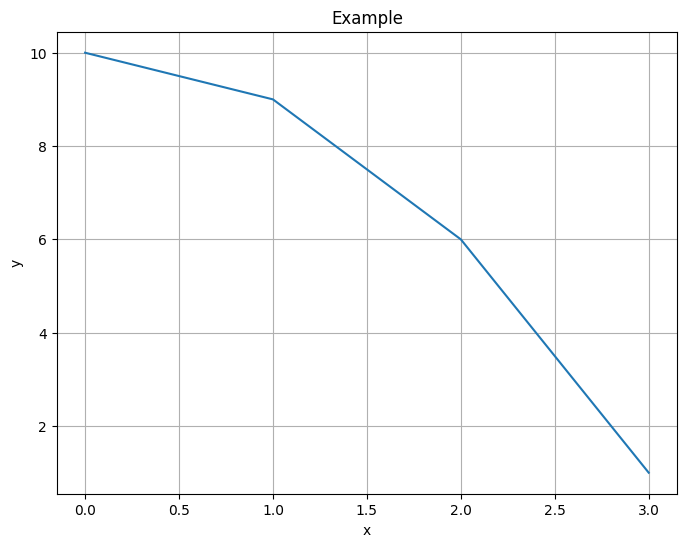

In [4]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid();

## Виды графиков
### Линейный график
    Готовим данные для графика в виде сводной таблицы

In [5]:
data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head()

,month,count
0,apr,2632
1,aug,6178
2,dec,182
3,jul,7174
4,jun,5318


Matplotlib

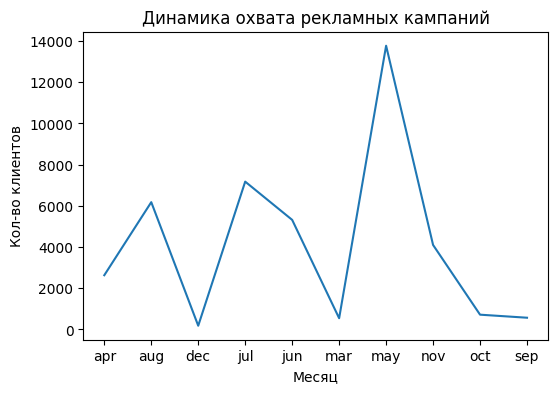

In [6]:
plt.figure(figsize=(6, 4))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

Seaborn

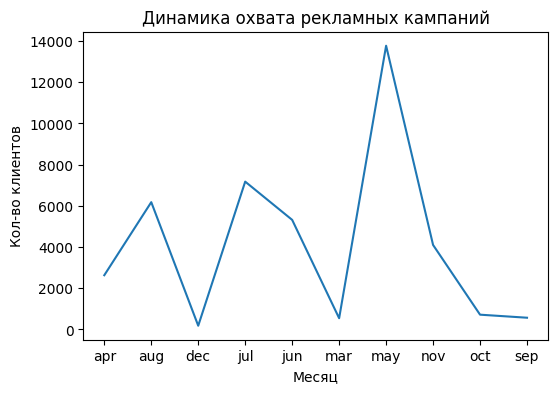

In [7]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=data['month'], y=data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

### Линейный график

Matplotlib

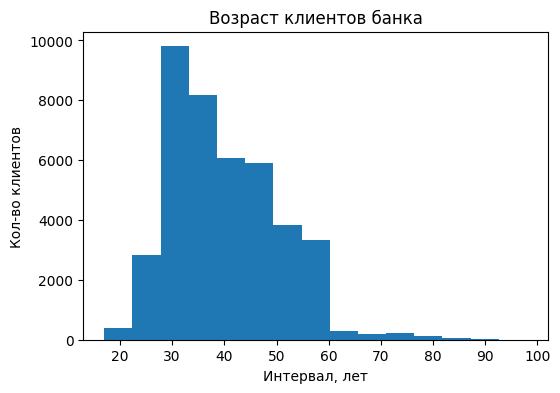

In [8]:
plt.figure(figsize=(6, 4))

plt.hist(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

Seaborn

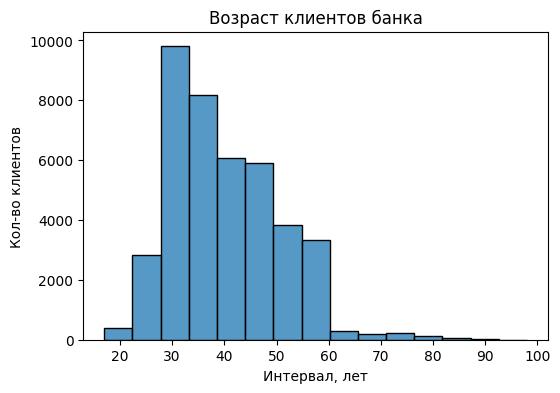

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

### Диаграмма рассеяния
    Готовим данные для графика в виде сводной таблицы

In [10]:
data = df.groupby('age')['previous'].sum().reset_index()
data.head()

,age,previous
0,17,9
1,18,21
2,19,28
3,20,41
4,21,29


Matplotlib

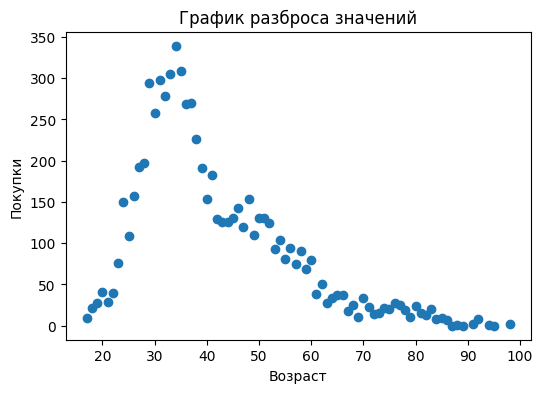

In [11]:
plt.figure(figsize=(6, 4))

plt.scatter(data['age'], data['previous'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

Seaborn

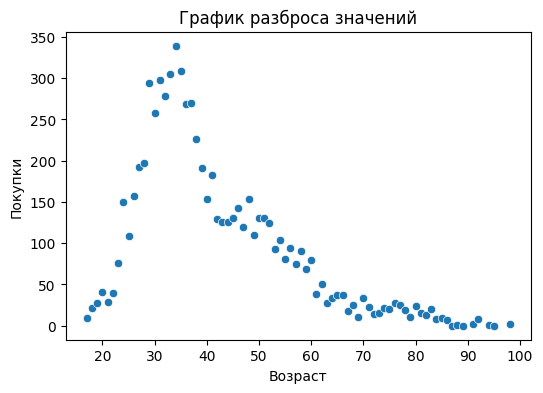

In [12]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=data['age'], y=data['previous'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

### Столбчатые диаграммы
    Готовим данные для графика

In [13]:
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,admin.,10422
1,blue-collar,9254
2,technician,6743
3,services,3969
4,management,2924


Matplotlib

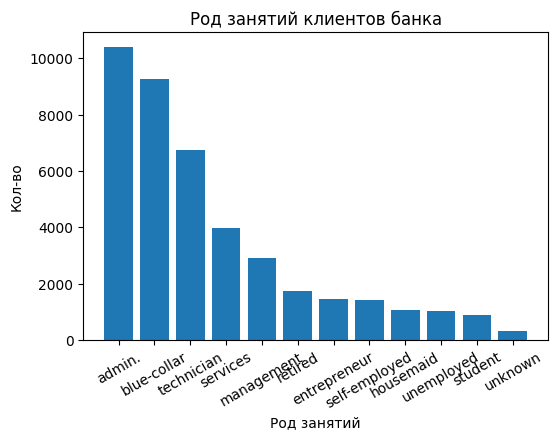

In [14]:
plt.figure(figsize=(6, 4))

plt.bar(data['index'], data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

Seaborn

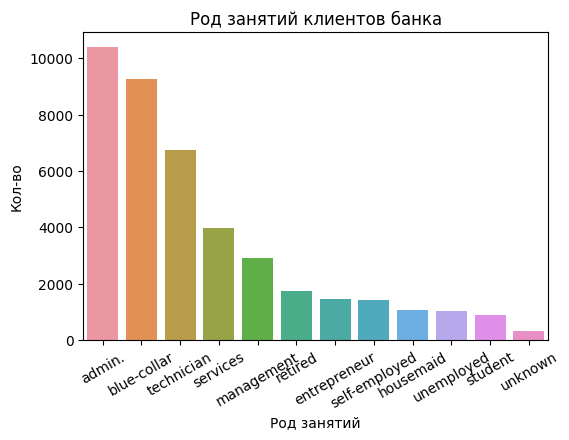

In [15]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

### Многорядовые столбчатые диаграммы
    Готовим данные для графика

In [16]:
data = pd.crosstab(df['job'], df['previous']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

previous,job,no,yes,2,3,4,5,6,7
0,admin.,8903,1204,216,75,15,6,2,1
1,blue-collar,8249,895,94,13,3,0,0,0
9,technician,5914,693,89,27,15,5,0,0
7,services,3451,440,62,13,3,0,0,0
4,management,2498,350,53,13,6,2,2,0


    cтроим столбчатую многорядную диаграмму

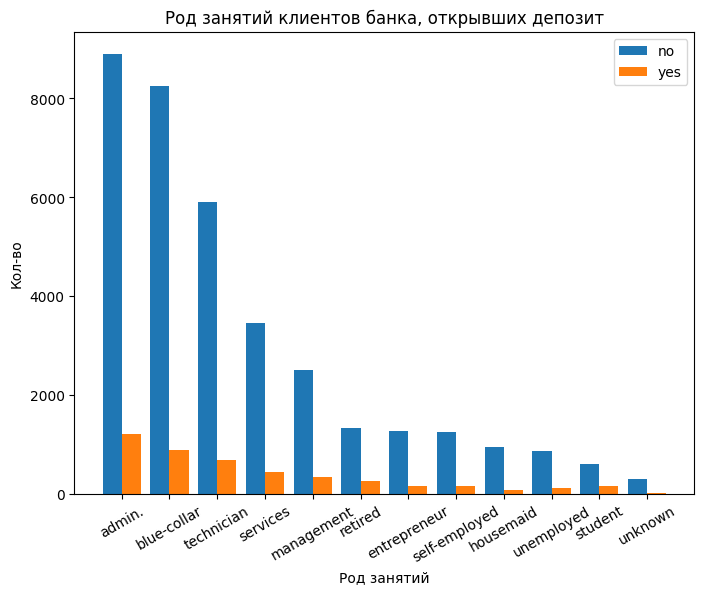

In [17]:
plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);  # добавляем метки делений

### Сложенная столбчатая диаграмма
    Готовим данные для графика

In [18]:
data = pd.crosstab(df['job'], df['previous'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

previous,job,no,yes,2,3,4,5,6,7
3,housemaid,0.894340,0.082075,0.018868,0.001887,0.001887,0.000943,0.0,0.0
1,blue-collar,0.891398,0.096715,0.010158,0.001405,0.000324,0.000000,0.0,0.0
11,unknown,0.887879,0.075758,0.030303,0.006061,0.000000,0.000000,0.0,0.0
2,entrepreneur,0.877060,0.109890,0.010989,0.001374,0.000687,0.000000,0.0,0.0
9,technician,0.877058,0.102773,0.013199,0.004004,0.002225,0.000742,0.0,0.0


    Строим столбчатую многорядную сложенную диаграмму

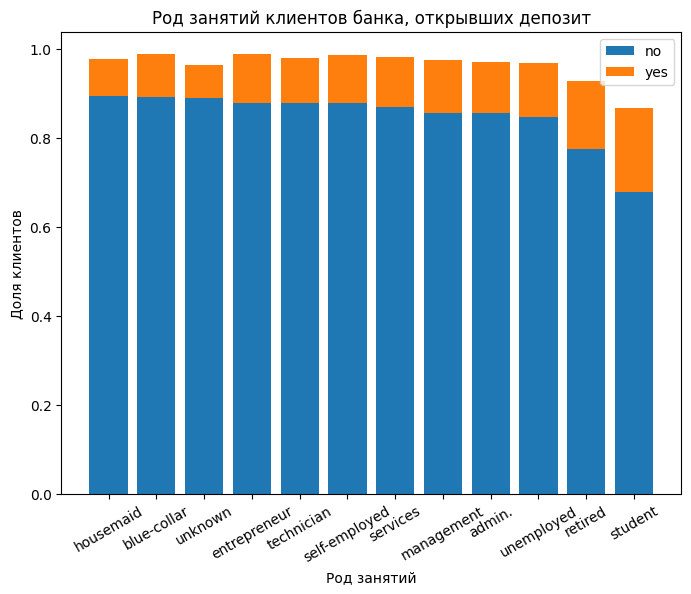

In [19]:
plt.figure(figsize=(8, 6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30);

### Ящики с усами
    Готовим данные для графика

In [20]:
data1 = df['duration'][df['previous'] == 1]
data2 = df['duration'][df['previous'] == 0]
data1.head()

4     137
8     174
9     191
20    246
27    226
Name: duration, dtype: int64

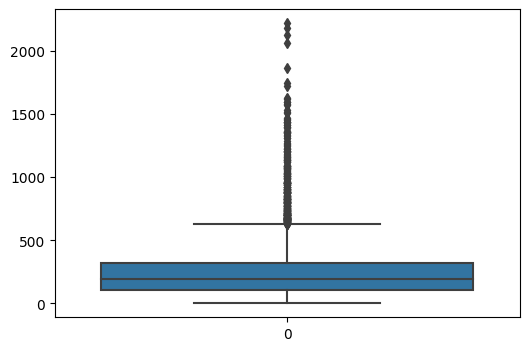

In [21]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1]);

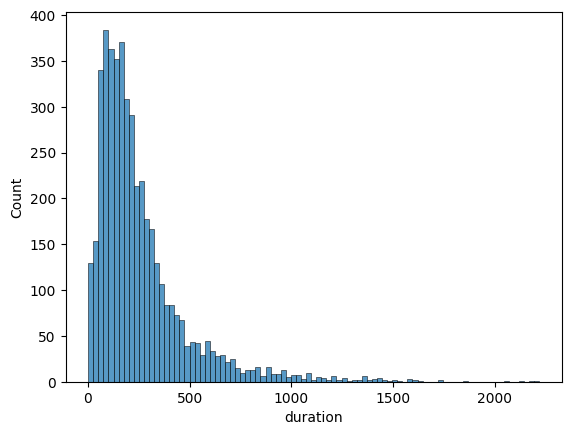

In [22]:
sns.histplot(x=data1);

Matplotlib

    Строим боксплот

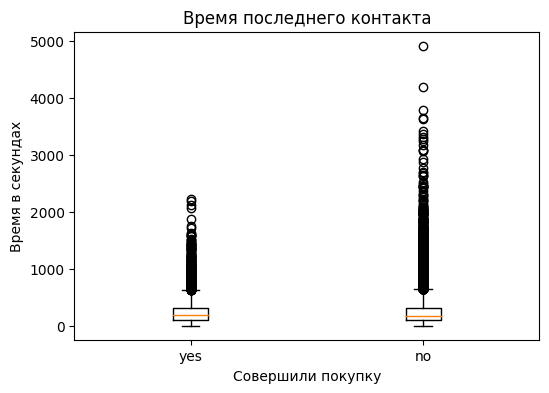

In [23]:
plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

    Строим боксплот без выбросов 

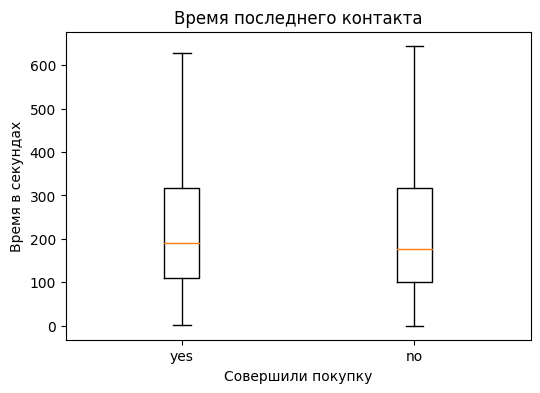

In [24]:
plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

Matplotlib

    Строим боксплот без выбросов

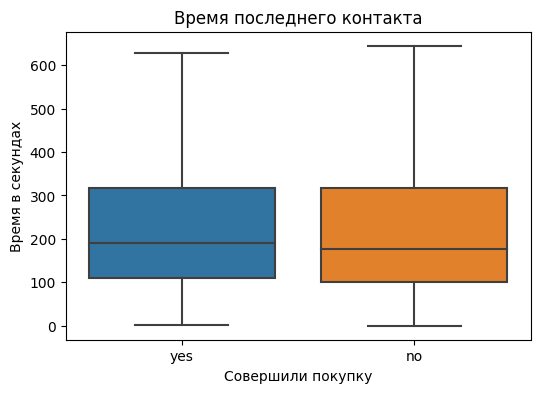

In [25]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([0, 1], ['yes', 'no']);

### Круговая диаграмма
    Готовим данные для графика

In [26]:
data = df['previous'].value_counts()
data.index = ['no', 'yes']
data.head()

ValueError: Length mismatch: Expected axis has 8 elements, new values have 2 elements

Matplotlib

    Строим боксплот без выбросов

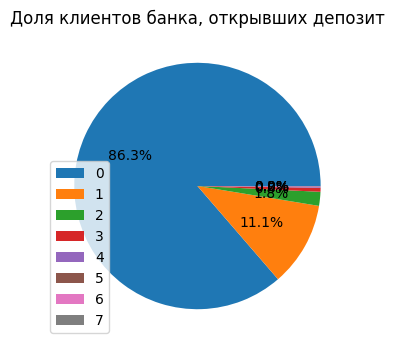

In [ ]:
plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);

## Визуальный анализ данны
### Описание датасета
Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.
- longitude - долгота
- latitude - широта
- housing_median_age - средний возраст дома
- total_rooms - общее количество комнат
- total_bedrooms - общее количество спален
- population - количество проживающих
- households - домохозяйства
- ocean_proximity - близость океана
- median_income - средний доход
- median_house_value - средняя стоимость дома* 

In [ ]:
df = pd.read_csv('housing.csv', sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Распределение вещественных признаков

    {'red', 'green', 'blue'} - дискретный признак ('red', 'green', 'blue', 'red', 'green', 'red')
    [0, 100] - вещественный признак (0, 5, 5.6, 10.5, 10.57)

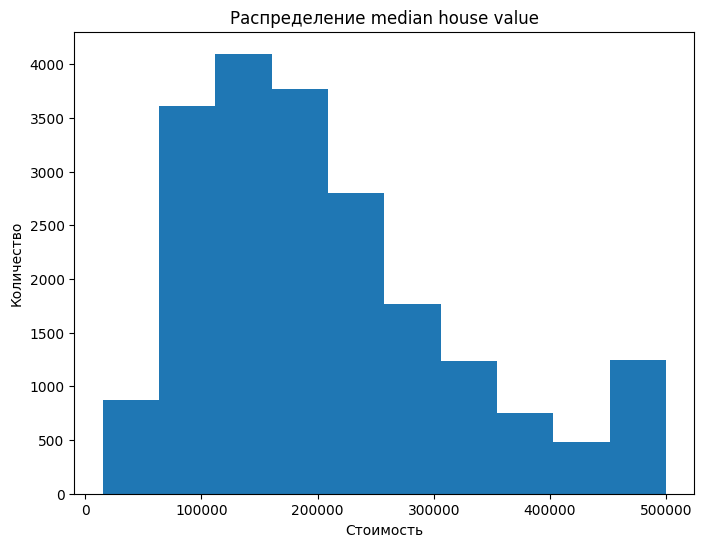

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['median_house_value'])
plt.title('Распределение median house value')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

In [ ]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

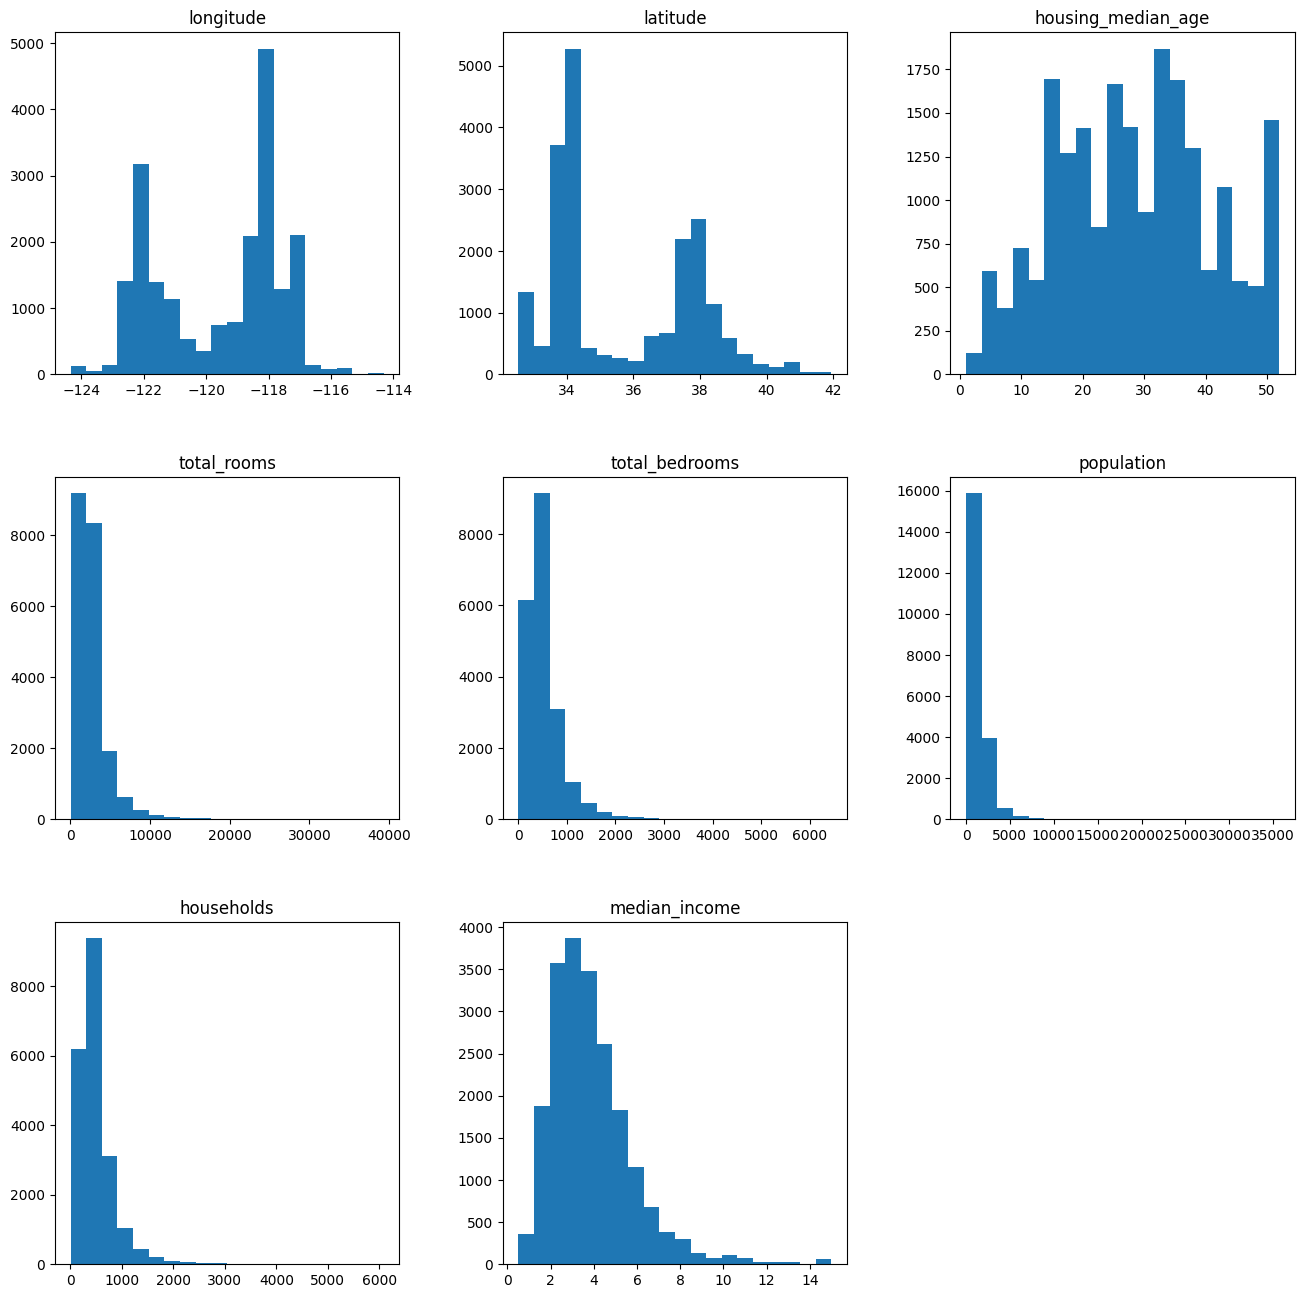

In [ ]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

Поиск выбросов с помощью box plot

Как строится box plot
- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

**Как строятся "усы"** - вариантов масса

- среднее +/- 3 сигма (стандартное отклонение)
- min / max
- median +/- 1.5*(q75 - q25),
- ...

    *Интерквартильный размах = q75 - q25

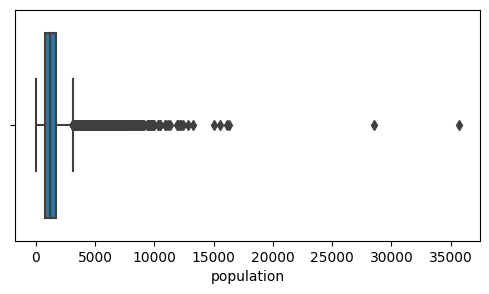

In [ ]:
plt.figure(figsize=(6, 3))

sns.boxplot(x=df['population'], whis=1.5)

plt.xlabel('population')
plt.show()

### Анализ категориальных признаков

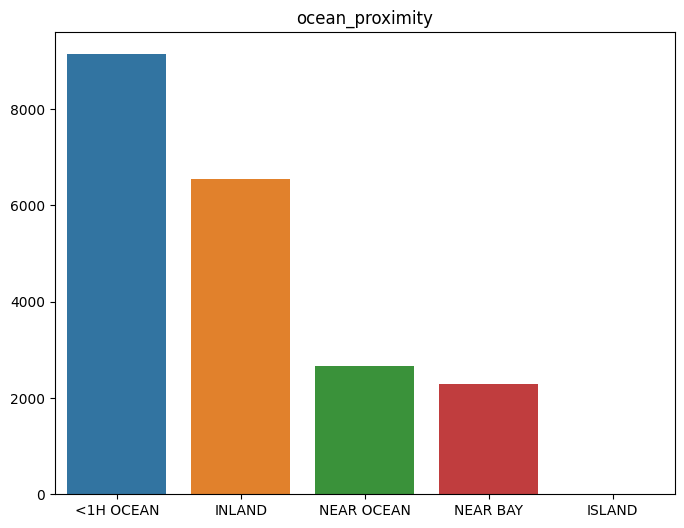

In [ ]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

In [ ]:
counts = df['INLAND'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('INLAND')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

KeyError: 'INLAND'

### Анализ взаимных распределений

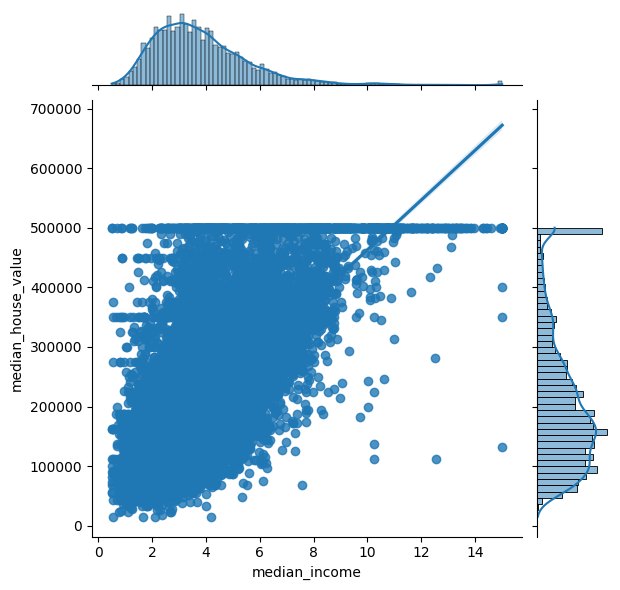

In [ ]:
sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind='reg');

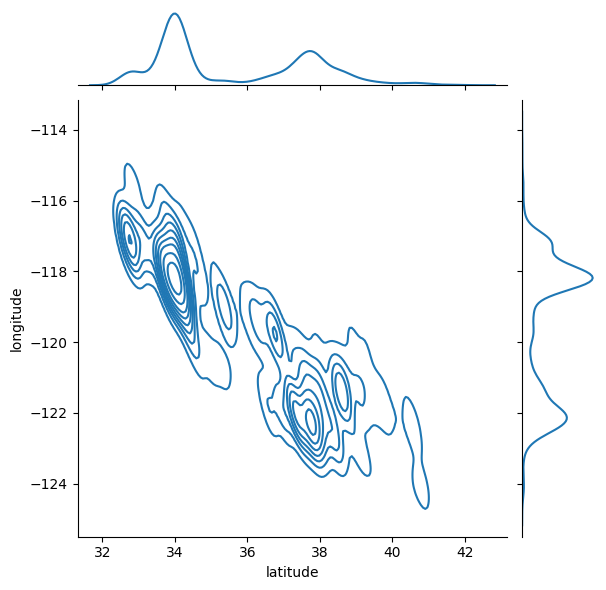

In [ ]:
sns.jointplot(x=df['latitude'], y=df['longitude'], kind='kde');

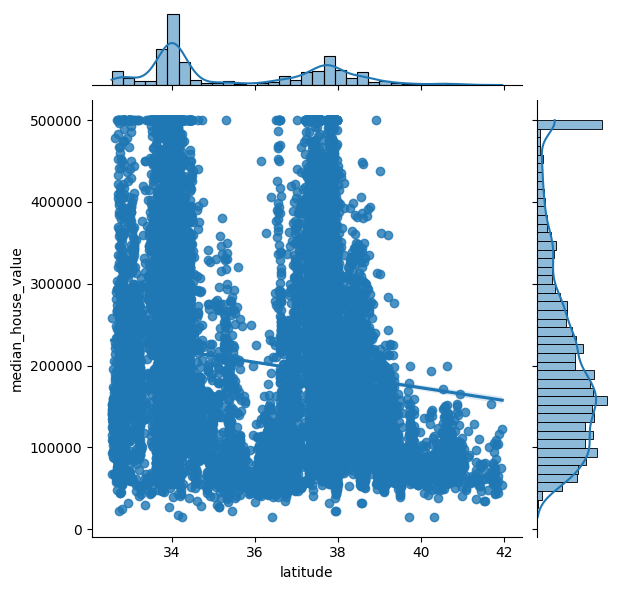

In [ ]:
sns.jointplot(x=df['latitude'], y=df['median_house_value'], kind='reg');

    Видно два города, имеет смысл посмотреть на зависимость по отдельности

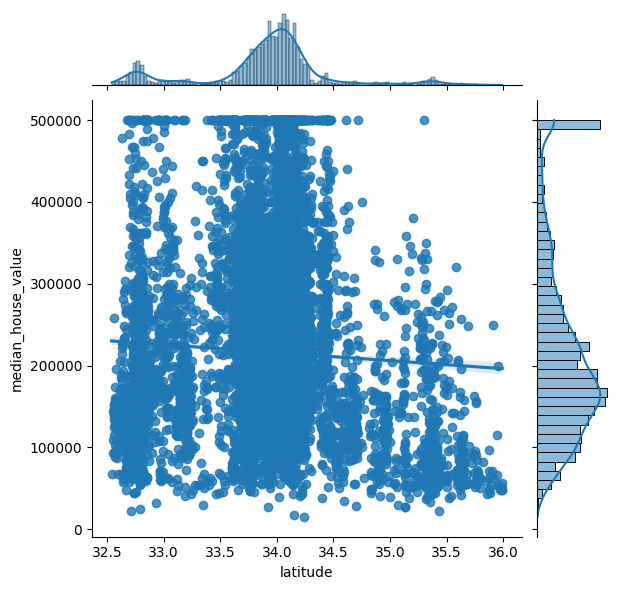

In [ ]:
df_cut = df[df['latitude'] < 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

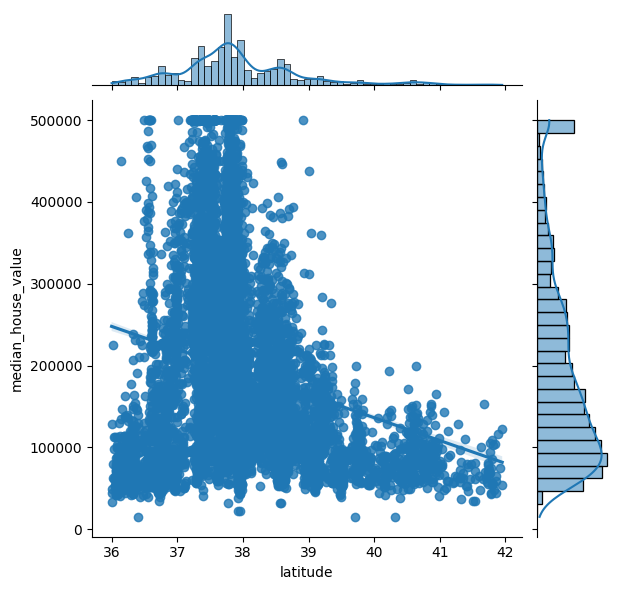

In [ ]:
df_cut = df[df['latitude'] >= 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

**longitude**

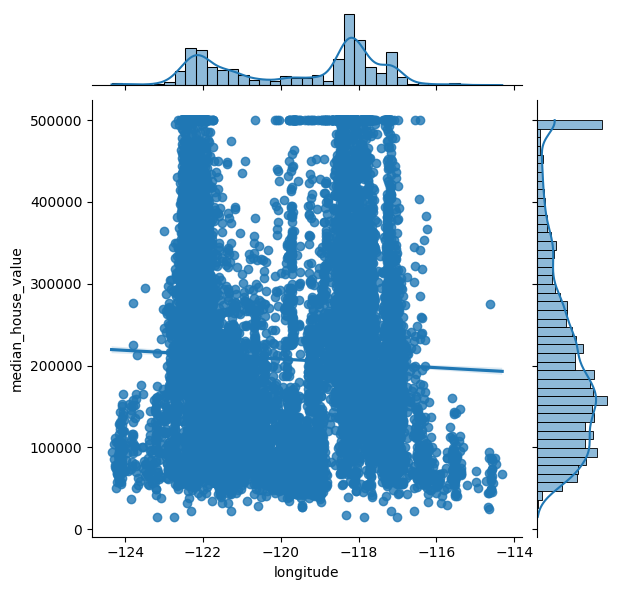

In [ ]:
sns.jointplot(x=df['longitude'], y=df['median_house_value'], kind='reg');

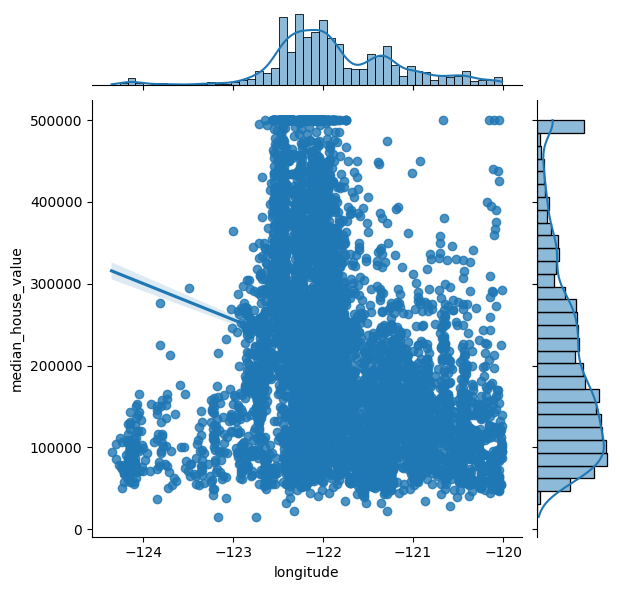

In [ ]:
df_cut = df[df['longitude'] < -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

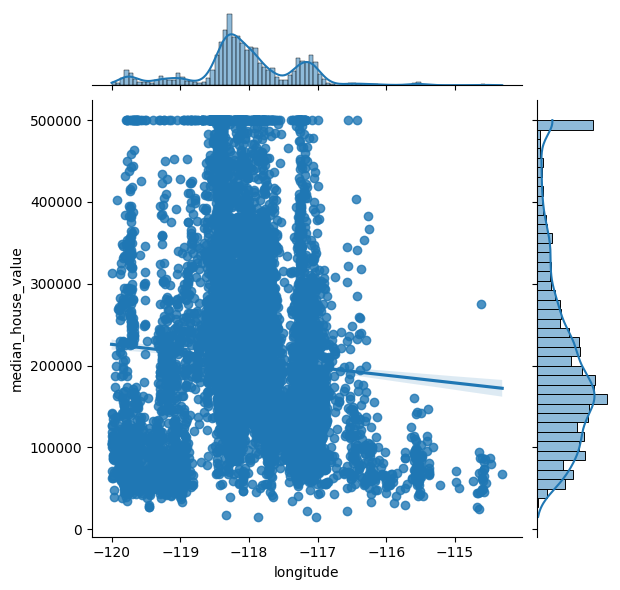

In [ ]:
df_cut = df[df['longitude'] >= -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

**Категориальные / бинарные признаки**

### box plot

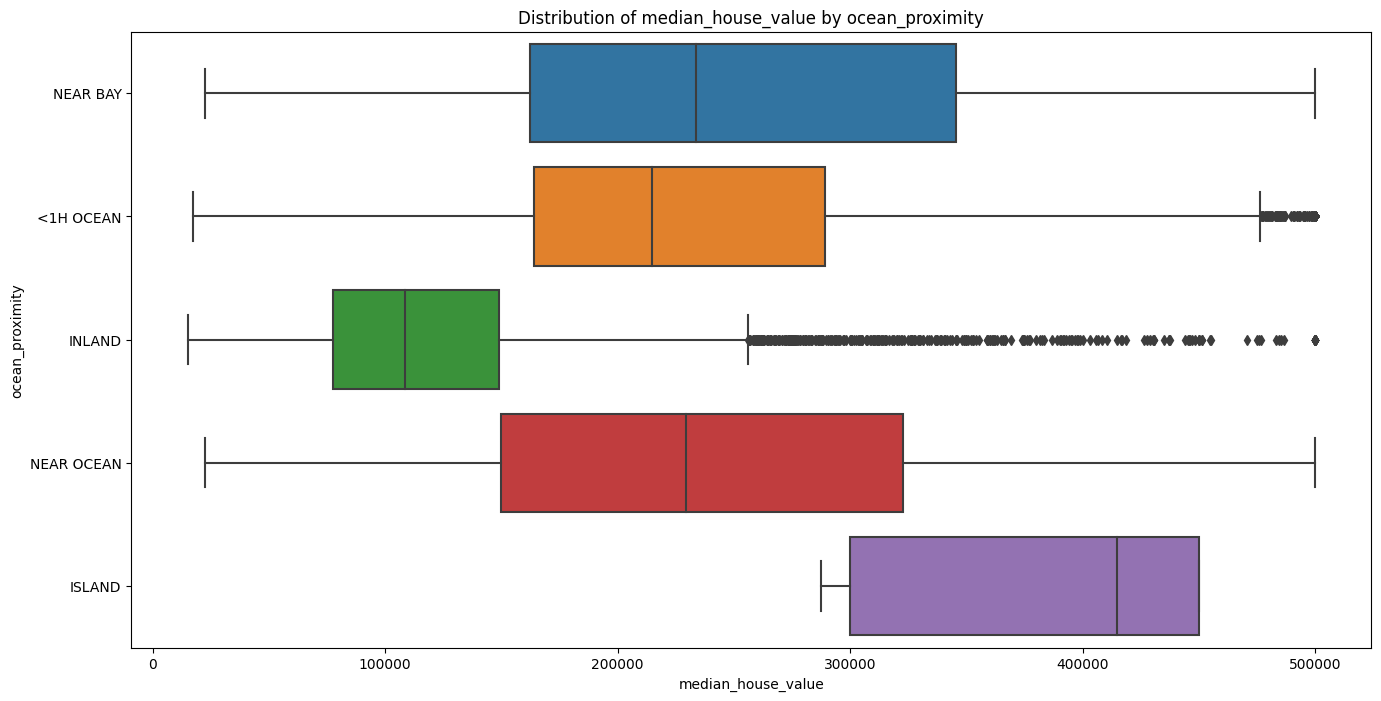

In [ ]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['median_house_value'], y=df['ocean_proximity'], whis=1.5)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity');

**Как строится box plot**
- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы

**Как строятся "усы"** - вариантов масса

* среднее +/- 3 сигма (стандартное отклонение)
* min / max
* median +/- 1.5*(q75 - q25),
* ...

    *Интерквартильный размах = q75 - q25

#### Матрица корреляций
- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Корреляция - мера только **линейной** связи

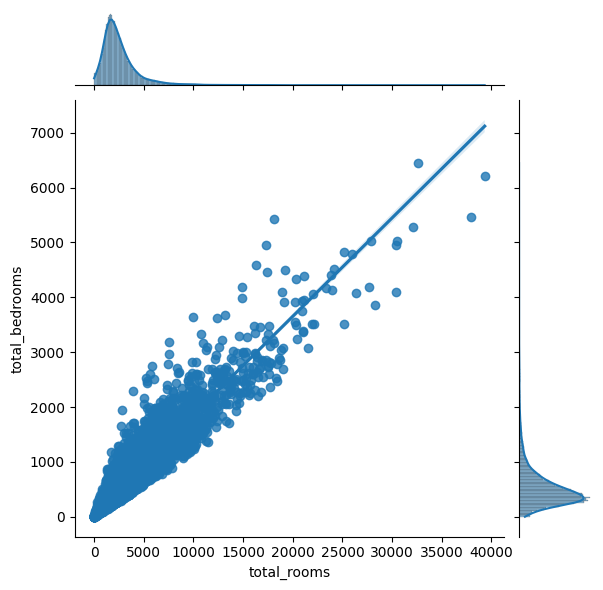

In [ ]:
sns.jointplot(x=df['total_rooms'], y=df['total_bedrooms'], kind='reg');

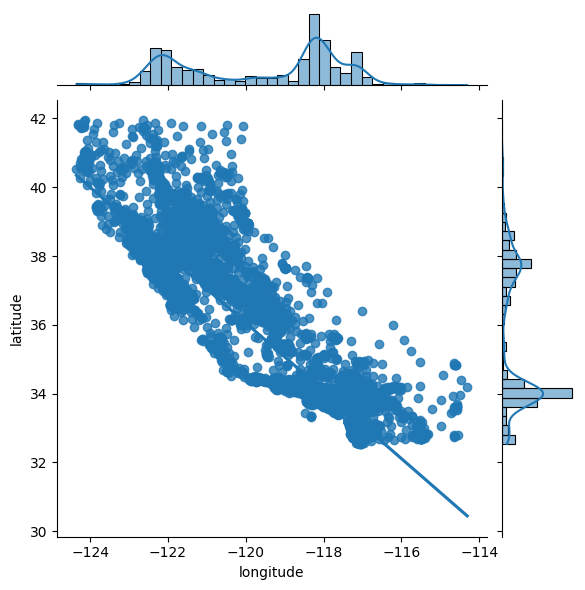

In [ ]:
sns.jointplot(x=df['longitude'], y=df['latitude'], kind='reg');

In [ ]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

C:\Users\psvak\AppData\Local\Temp\ipykernel_10368\4194942596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
latitude,-0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
housing_median_age,0.0,0.0,1.0,-0.4,-0.3,-0.3,-0.3,0.0,0.0
total_rooms,0.0,0.0,-0.4,1.0,0.9,0.9,0.9,0.0,0.0
total_bedrooms,0.0,0.0,-0.3,0.9,1.0,0.9,1.0,0.0,0.0
population,0.0,0.0,-0.3,0.9,0.9,1.0,0.9,0.0,0.0
households,0.0,0.0,-0.3,0.9,1.0,0.9,1.0,0.0,0.0
median_income,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7
median_house_value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,1.0


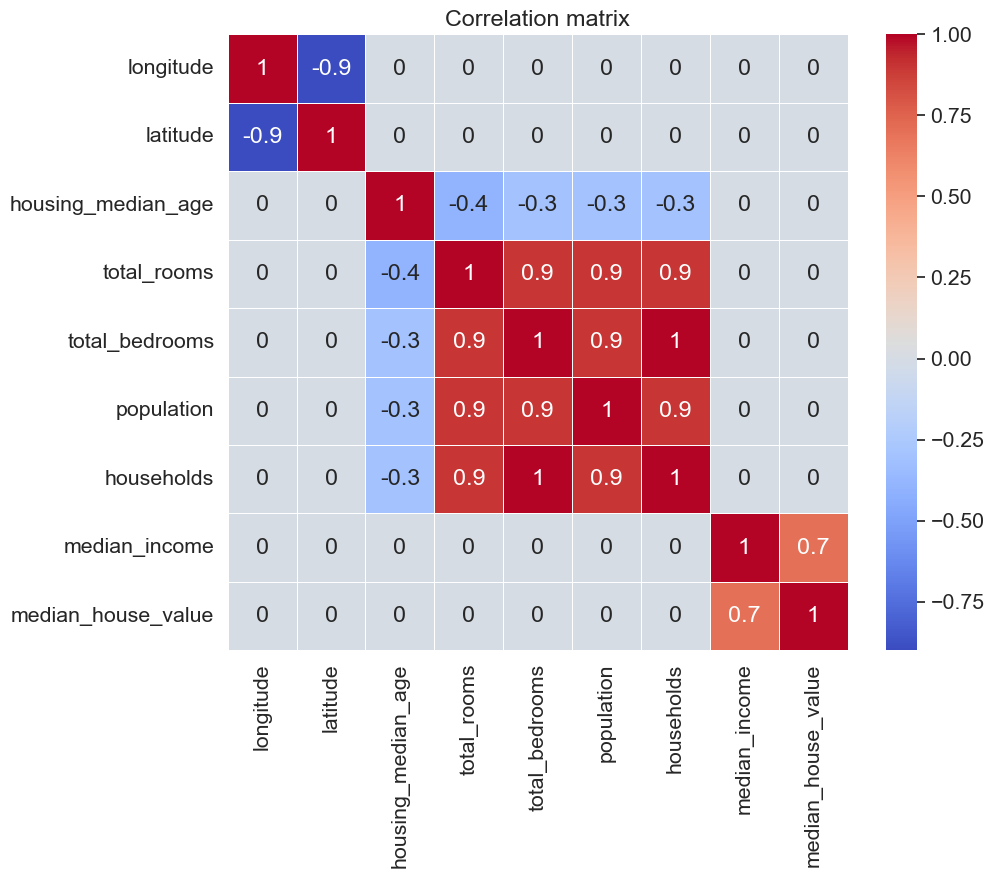

In [ ]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

### Гео данные

###### min_long = -124.55
###### max_long = -113.80
###### min_lat = 32.45
###### max_lat = 42.05

In [ ]:
import matplotlib.image as img
california_map = img.imread('California_Map_1.png')

plt.figure(figsize=(12, 9))
plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5);

NameError: name 'min_long' is not defined

<Figure size 1200x900 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 9))

sc = plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['median_house_value'])

plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography");

KeyError: 'longitude'

<Figure size 1200x900 with 0 Axes>

In [ ]:
import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.latitude, point.longitude],
        radius=2,
        popup=point.median_house_value
    ).add_to(this_map)
    
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

ModuleNotFoundError: No module named 'folium'

### Kepler**

In [ ]:
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./california.html')

ModuleNotFoundError: No module named 'keplergl'